<a href="https://colab.research.google.com/github/ishi2035/Stock-price-prediction/blob/main/STOCK_PRICE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import pandas_datareader as data

In [ ]:
df = pd.read_csv('dataset.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-07-02,20.883215,21.195356,20.842857,21.161428,18.093399,400092000
1,2012-07-03,21.245714,21.428572,21.214287,21.407499,18.303801,241712800
2,2012-07-05,21.448570,21.940714,21.416071,21.783571,18.625349,484383200
3,2012-07-06,21.681786,21.730000,21.485001,21.638571,18.501368,418930400
4,2012-07-09,21.617857,21.924999,21.575357,21.924643,18.745960,379405600


In [ ]:
df = df.reset_index()

In [ ]:
df = df.drop(['Date','Adj Close'], axis = 1)

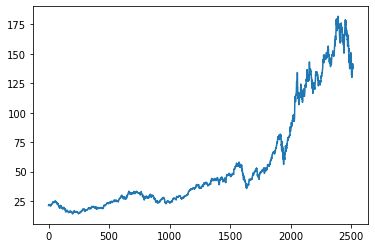

In [ ]:
plt.plot(df.Close)

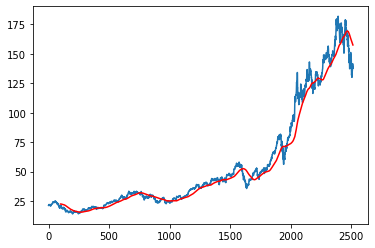

In [ ]:
ma100 = df.Close.rolling(100).mean()
plt.plot(df.Close)
plt.plot(ma100, 'r')

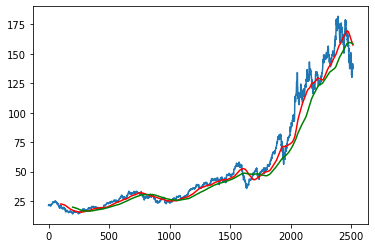

In [ ]:
ma200 = df.Close.rolling(200).mean()
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [ ]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

data_training_array = scaler.fit_transform(data_training)
data_training_array

In [ ]:
x_train = []
y_train = []
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i:0])

x_train , y_train = np.array(x_train), np.array(y_train)

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential 

In [ ]:
model = Sequential()
model.add(LSTM(units=50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation = 'relu', return_sequences = True ))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [ ]:
model.summary()

In [ ]:
# from calendar import EPOCH
# from pickletools import optimize


model.compile(optimizer = 'adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs= 10 )

In [ ]:
model.save('keras_model.h5')

In [ ]:
past_100 = data_training.tail(100)

In [ ]:
final_df = past_100.append(data_testing, ignore_index=True)
final_df

In [ ]:
input_data = scaler.fit_transform(final_df)

In [ ]:
input_data.shape

In [ ]:
x_test=[]
y_test=[]
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
y_test


In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
y_test

In [ ]:
print(x_test.shape)
print(y_test.shape)

In [ ]:
y_predicted= model.predict(x_test)
y_predicted.shape

In [ ]:
y_test

In [ ]:
y_predicted

In [ ]:
scale_factor = 1/(scaler.scale_)
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

In [ ]:
from cProfile import label

# plt.figure(figsize=(12,6))
plt.plot(y_test,'b', label = 'original price')
plt.plot(y_predicted, 'g',label='predicted price' )
# plt.xlabel('Time')
# plt.ylabel('Price')